In [2]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [37]:
data = np.genfromtxt('sx_scan.dat')
data = np.transpose(data)
x = np.array(data[1])
y = np.array(data[2])
sx = np.arange(0, 19.3, 0.1)

[[Fit Statistics]]
    # function evals   = 8
    # data points      = 193
    # variables        = 2
    chi-square         = 102.846
    reduced chi-square = 0.538
[[Variables]]
    m:  -18.9644248 +/- 0.009480 (0.05%) (init=-15)
    c:   942.739425 +/- 0.105230 (0.01%) (init= 1000)
[[Correlations]] (unreported correlations are <  0.100)
    C(m, c)                      = -0.865 


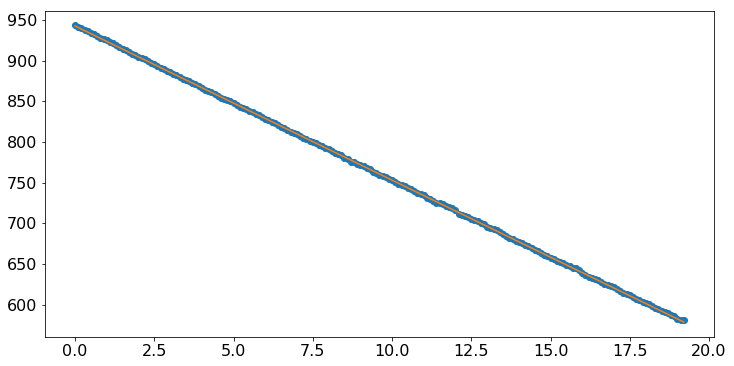

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), facecolor='w', sharex=True, sharey=False)
import sys
sys.path.append("C:\\Anaconda\\Lib\\site-packages")
import scipy
from lmfit import minimize, Parameters

def line(p, x):
    #return p['m']*x + p['c']
    return p['m']*x + float(p['c'])

def fit_func(p, x, data):
    return data - line(p,x)

params = Parameters()
params.add('m', value=-15.0)
params.add('c', value=1000.0)

result = minimize(fit_func, params, args=(sx, x))
print(fit_report(result))

p_line = result.params

plt.plot(sx, x, 'o')
plt.plot(sx, line(p_line,sx))
plt.show()

[[Fit Statistics]]
    # function evals   = 69
    # data points      = 193
    # variables        = 5
    chi-square         = 96.898
    reduced chi-square = 0.515
[[Variables]]
    c:    291.530441 +/- 0.051894 (0.02%) (init= 290)
    f:    2.74837142 +/- 0.037267 (1.36%) (init= 3)
    mf:   0.01655619 +/- 0.002309 (13.95%) (init= 0)
    a:    1.3328e-06 +/- 0.050811 (3812350.23%) (init= 1)
    ma:   0.07251618 +/- 0.007917 (10.92%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(f, mf)                     = -0.986 
    C(a, ma)                     = -0.568 


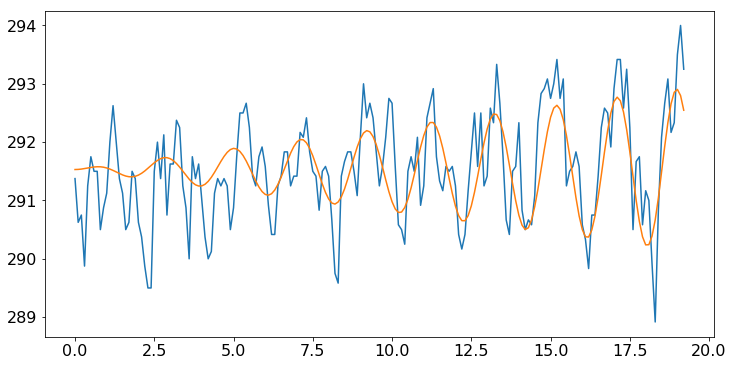

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), facecolor='w', sharex=True, sharey=False)
import sys
sys.path.append("C:\\Anaconda\\Lib\\site-packages")
import scipy
from lmfit import minimize, Parameters, fit_report

def wobble(p, x):
    return (float(p['a']) + p['ma']*x)*np.sin((float(p['f']) + p['mf']*x)*x) + float(p['c'])

def fit_func(p, x, data):
    return data - wobble(p,x)

params = Parameters()
#params.add('m', value=-15.0)
params.add('c', value=290.0)
params.add('f', value=3.0)
params.add('mf', value=0)
params.add('a', value=1.0, min=0)
params.add('ma', value=0.0, vary=True)

result = minimize(fit_func, params, args=(sx, y))


print(fit_report(result))
      
p_wobble = result.params
#p_wobble = params

plt.plot(sx, y)
plt.plot(sx, wobble(p_wobble,sx))
plt.show()

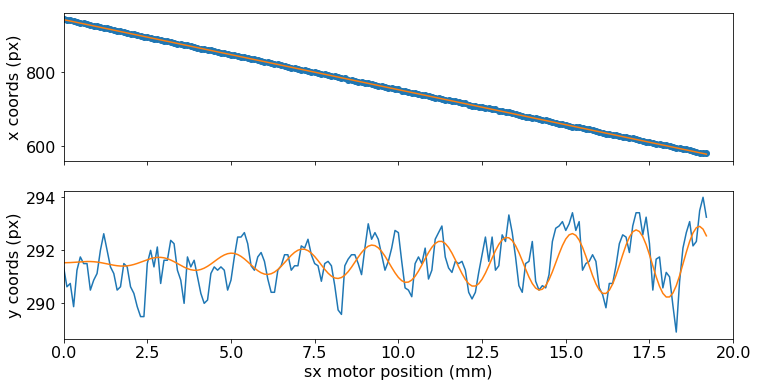

In [121]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), facecolor='w', sharex=True, sharey=False)

fig.add_subplot(111, frameon=False)# big frame
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')


ax[0].plot(sx,x, 'o')
ax[0].plot(sx, line(p_line,sx))
ax[1].plot(sx,y)
ax[1].plot(sx, wobble(p_wobble,sx))

ax[0].set_xlim([0, 20])

ax[0].set_ylabel('x coords (px)')
ax[1].set_ylabel('y coords (px)')
plt.xlabel('sx motor position (mm)')

plt.savefig('graphics/sx_movement.png')
plt.show()